# Segment 4 Lab 3

## Fine-tuned LLM using QLoRA with Llama 3.1 as the base model

First, here's a link to Google Colab set up for training with QLoRA

https://colab.research.google.com/drive/1IqxWtUzuV5ks2kS1oO4Mge3Mf1o3rhRj

And here's a link to Google Colab set up for inference:

https://colab.research.google.com/drive/1shI0i5QiMWL8fSmM-VcBI7RT5NjzZJ17

Once this is set up, I have this running on Modal

If you want to do this too, head over to modal.com to set up your free starter account with free credit

In [6]:
# Just one import to start with!!

import modal

During the class I might visit this URL to show the code deployed on Modal:

https://modal.com/apps/ed-donner/main/ap-stiZMq9syc9zikKRoLnRor?functionId=fu-LumBocLb9rvkzuIUBQGn42&activeTab=functions

In [7]:
# For you to experiment after the class: below we set up and deploy our proprietary LLM over modal
# Here we execute it directly

Pricer = modal.Cls.from_name("pricer-service", "Pricer")
pricer = Pricer()

In [8]:
pricer.price.remote("Quadcast HyperX condenser mic, connects via usb-c to your computer for crystal clear audio")

133.0

In [4]:
# Generations of iPad pro

ipad1 = pricer.price.remote("iPad pro 1st generation")
ipad6 = pricer.price.remote("iPad pro 6th generation")
print(f"iPad Pro Gen1 estimate ${ipad1}, iPad Pro Gen6 estimate ${ipad6}")

iPad Pro Gen1 estimate $299.0, iPad Pro Gen6 estimate $799.0


In [9]:
from items import Item
import pickle

# Load in the test pickle file

with open('../test.pkl', 'rb') as file:
    test = pickle.load(file)

In [10]:
def proprietary_llm(item):
    return pricer.price.remote(item.text)

In [11]:
proprietary_llm(test[0])

412.0

1: Guess: $412.00 Truth: $374.41 Error: $37.59 Item: OEM AC Compressor w/A/C Repair Kit For F...
2: Guess: $182.00 Truth: $225.11 Error: $43.11 Item: Motorcraft YB3125 Fan Clutch
3: Guess: $31.00 Truth: $61.68 Error: $30.68 Item: Dorman 603-159 Front Washer Fluid Reserv...
4: Guess: $350.00 Truth: $599.99 Error: $249.99 Item: HP Premium 17.3-inch HD Plus Touchscreen...
5: Guess: $19.00 Truth: $16.99 Error: $2.01 Item: 5-Position Super Switch Pickup Selector ...
6: Guess: $19.00 Truth: $31.99 Error: $12.99 Item: Horror Bookmarks, Resin Horror Bookmarks...
7: Guess: $133.00 Truth: $101.79 Error: $31.21 Item: SK6241 - Stinger 4 Gauge 6000 Series Pow...
8: Guess: $299.00 Truth: $289.00 Error: $10.00 Item: Godox ML60Bi LED Light Kit, Handheld LED...
9: Guess: $950.00 Truth: $635.86 Error: $314.14 Item: Randall RG75DG3PLUS G3 Plus 100-Watt Com...
10: Guess: $54.00 Truth: $65.99 Error: $11.99 Item: HOLDWILL 6 Pack LED Shop Light, 4FT 24W ...
11: Guess: $189.00 Truth: $254.21 Error: $65.21 Ite

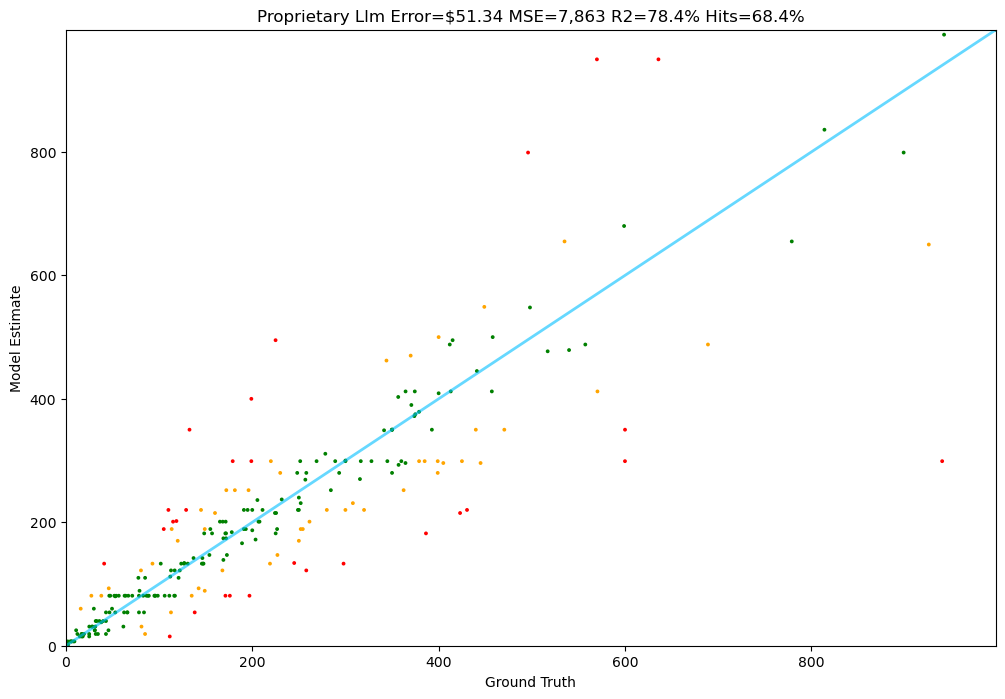

In [12]:
from testing import Tester
Tester.test(proprietary_llm, test)

In [5]:
import logging
root = logging.getLogger()
root.setLevel(logging.INFO)

In [6]:
from agents.specialist_agent import SpecialistAgent

specialist = SpecialistAgent()
specialist.price("Quadcast HyperX condenser mic, connects via usb-c to your computer for crystal clear audio")

INFO:root:[Specialist Agent] Specialist Agent is initializing - connecting to modal
INFO:root:[Specialist Agent] Specialist Agent is ready
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model
INFO:root:[Specialist Agent] Specialist Agent completed - predicting $133.00


133.0

# For you to get this to work yourself

## We need to set your HuggingFace Token as a secret in Modal

1. Go to modal.com, sign in and go to your dashboard
2. Click on Secrets in the nav bar
3. Create new secret, click on Hugging Face
4. Fill in your HF_TOKEN where it prompts you


In [ ]:
# First time: uncomment and run the line below
# !modal setup

In [ ]:
from hello import app, hello

In [ ]:
with app.run(show_progress=False):
    reply=hello.local()
reply

In [ ]:
with app.run(show_progress=False):
    reply=hello.remote()
reply

In [ ]:
from llama import app, generate

In [ ]:
with modal.enable_output():
    with app.run():
        result=generate.remote("Life is a mystery, everyone must stand alone, I hear")
result

In [ ]:
import modal
from pricer_ephemeral import app, price

In [ ]:
with modal.enable_output():
    with app.run():
        result=price.remote("Quadcast HyperX condenser mic, connects via usb-c to your computer for crystal clear audio")
result

# For you to explore after the class

From a command line, `modal deploy xxx` will deploy your code as a Deployed App

This is how you could package your AI service behind an API to be used in a Production System.

You can also build REST endpoints easily, although we won't cover that as we'll be calling direct from Python.

In [ ]:
!modal deploy pricer_service

In [ ]:
pricer = modal.Function.lookup("pricer-service", "price")

In [ ]:
pricer.remote("Quadcast HyperX condenser mic, connects via usb-c to your computer for crystal clear audio")

In [ ]:
!modal deploy pricer_service2

In [ ]:
Pricer = modal.Cls.lookup("pricer-service", "Pricer")
pricer = Pricer()
reply = pricer.price.remote("Quadcast HyperX condenser mic, connects via usb-c to your computer for crystal clear audio")
print(reply)